In [66]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('khn_data.csv', dtype={'publish_date': str})

In [40]:
df['publish_date'] = df['publish_date'].str.replace('\+00:00', '')

<ipython-input-40-4be4834e8ce4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['publish_date'] = df['publish_date'].str.replace('\+00:00', '')


In [42]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d %H:%M:%S')

In [43]:
df['race_article'] = df['keywords'].apply(lambda x: any([k in x for k in ['race', 'racism']]))

In [44]:
df['year_month'] = df['publish_date'].dt.strftime('%Y-%m')

In [45]:
df.head()

,headline,url,tags,summary,keywords,publish_date,authors,race_article,year_month
0,"Unvaccinated, Homebound and Now Hospitalized W...",https://khn.org/news/article/unvaccinated-home...,"{'Bill Of The Month', 'Lost On The Frontline',...",Dr. Leora Horwitz treats fewer and fewer covid...,"['care', 'hospitalized', 'city', 'vaccine', 'v...",2021-06-16 16:15:00,['Fred Mogul'],False,2021-06
1,Recibir la ayuda de FEMA para funerales de cov...,https://khn.org/news/article/recibir-la-ayuda-...,"{'Bill Of The Month', 'Lost On The Frontline',...",Gálvez está esperando la respuesta de FEMA par...,"['covid', 'fema', 'y', 'tenacidad', 'ayuda', '...",2021-06-16 15:22:12,[],False,2021-06
2,Collecting FEMA Funeral Money Takes Some Tenac...,https://khn.org/news/article/collecting-fema-f...,"{'Bill Of The Month', 'Lost On The Frontline',...",As a funeral director at Ingold Funeral and Cr...,"['galvez', 'help', 'huerta', 'collecting', 'co...",2021-06-16 09:00:00,"['Heidi De Marco', 'Kaiser Health News']",False,2021-06
3,"For Toddlers, Pandemic Shapes Development Duri...",https://khn.org/news/article/for-toddlers-pand...,"{'Bill Of The Month', 'Lost On The Frontline',...","But even as the nation reopens, mental health ...","['care', 'young', 'formative', 'toddlers', 'ch...",2021-06-16 09:00:00,['Leah Gullet'],False,2021-06
4,Being Vaccinated Doesn’t Mean You Must Go Mask...,https://khn.org/news/article/being-vaccinated-...,"{'Bill Of The Month', 'Lost On The Frontline',...","For more than a year, public health officials ...","['covid', 'health', 'doesnt', 'mask', 'vaccina...",2021-06-15 09:00:00,['Bernard J. Wolfson'],False,2021-06


In [72]:
grouped = df.groupby('year_month')['race_article'].agg(['count', 'sum', 'mean'])

<AxesSubplot:xlabel='year_month', ylabel='count'>

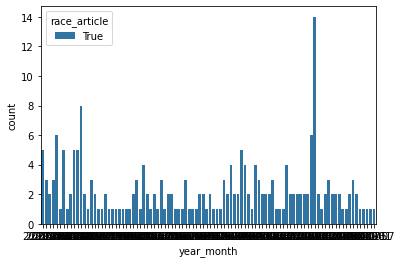

In [68]:
sns.countplot(x='year_month', hue='race_article', data=df[df['race_article'] == True])

<AxesSubplot:xlabel='year_month', ylabel='mean'>

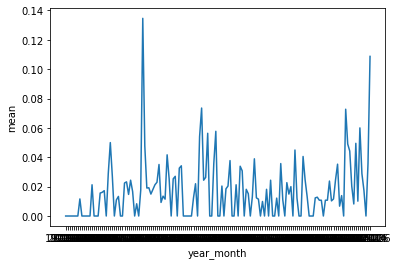

In [78]:
sns.lineplot(x=grouped.index, y='mean', data=grouped)